# **# Trabajo Práctico Integrador: Data Analytics - Entrega Final
## Christian Perez - Comision: 25262


**Etapa 1 - Recopilación y Preparación de Datos**

# **Punto 1**
# *Tomar Datos de los Datasets y Cargarlos en DataFrames*



In [257]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive/')

# Importar la librería Pandas
import pandas as pd

# Otros Imports
from dateutil.parser import parse
from datetime import datetime
import math

uri = '/content/drive/My Drive/datasets/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Dataset Clientes:**


In [258]:
def armarDataFrame(nombre, mostrar=1):
  file_name = nombre + '.csv'
  file_path = uri + file_name
  data_frame = pd.read_csv(file_path)
  if (mostrar == 1):
    print("Data Frame " + nombre + ":")
    display(data_frame.head())
  return data_frame

In [259]:
df_clientes = armarDataFrame("clientes")



Data Frame clientes:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


# **Dataset Marketing:**

In [260]:
df_mktg = armarDataFrame("marketing")


Data Frame marketing:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [261]:
df_ventas = armarDataFrame("ventas")

Data Frame ventas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



# **Punto 2**
# *Realizar un script básico que calcule las ventas mensuales utilizando variables y operadores.*



Nota:
Realice los 2 puntos para repasar PY y aprovechar Pandas para el manejo de los datasets


In [262]:
def generarDiccionarioTotales():
  dict_Totales = {"01":0, "02":0, "03":0, "04":0, "05":0, "06":0, "07":0, "08":0, "09":0, "10":0, "11":0, "12":0}

  return dict_Totales

def procesarVentas(imprimir=1):
  dict_Meses = {"01":"Enero", "02":"Febrero", "03":"Marzo", "04":"Abril", "05":"Mayo", "06":"Junio", "07":"Julio", "08":"Agosto", "09":"Septiembre", "10":"Octubre", "11":"Noviembre", "12":"Diciembre"}
  dict_Totales = generarDiccionarioTotales()
  aux_venta = 0
  for index, row in df_ventas.iterrows():

      cantidad = row['cantidad']

      if (type(cantidad) != float):
        continue
      float_cantidad = row['cantidad']
      if (math.isnan(float_cantidad)):
        continue


      if (len(row['fecha_venta']) < 10):
        continue
      fecha = row['fecha_venta'][3:5]

      if (int(fecha) > 0 and int(fecha) < 10 and len(fecha) == 1):
        mes = '0' + str(fecha)
      elif (len(fecha) == 2):
        mes = str(fecha)
      else:
        continue


      if (type(row['precio']) == float):
        float_precio = row['precio']
      else:
        aux_pr = row['precio'][1:]
        float_precio = float(aux_pr)
      if (math.isnan(float_precio)):
         continue



      venta = float_cantidad * float_precio

      dict_Totales[mes] += venta

  if (imprimir == 1):
    for key, value in dict_Meses.items():
      valor_venta = f"{dict_Totales[key]:.2f}"
      print(value + "= " + str(valor_venta) + "\n")


  return



# *Ventas Mensuales:*
<br>
<br>

In [263]:
procesarVentas(1)

Enero= 129604.99

Febrero= 118672.44

Marzo= 136779.15

Abril= 144380.10

Mayo= 143727.25

Junio= 108480.17

Julio= 116229.97

Agosto= 119680.15

Septiembre= 115787.85

Octubre= 112117.13

Noviembre= 119951.79

Diciembre= 117631.94



# **Punto 3**
# *Estructuras de Datos: Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad).*



In [264]:

def procesarDatosVentas(imprimir=1):
  lista_prod = []
  dict_productos = {"Producto": "", "Precio": 0, "Cantidad": 0}


  for index, row in df_ventas.iterrows():

      cantidad = row['cantidad']

      if (type(cantidad) != float):
        continue
      float_cantidad = row['cantidad']
      if (math.isnan(float_cantidad)):
        continue

      if (type(row['precio']) == float):
        float_precio = row['precio']
      else:
        aux_pr = row['precio'][1:]
        float_precio = float(aux_pr)
      if (math.isnan(float_precio)):
         continue


      if (type(row['producto']) != str or row['producto'] == ""):
        continue

      # Busco el producto
      producto_buscado = -1
      for prd in lista_prod:
        # Si lo encontro en la lista, busca la posicion del mismo
        if (prd['Producto'] == row['producto']):
          producto_buscado = lista_prod.index(prd)
          break

      # Si no encontro el producto
      if (producto_buscado == -1):
          # Alta de producto
          dict_productos = {"Producto": row['producto'], "Precio": float_precio, "Cantidad": float_cantidad}
          lista_prod.append(dict_productos)
      else:
          # Si lo encontro se actualiza
          lista_prod[producto_buscado]['Cantidad'] += float_cantidad
          lista_prod[producto_buscado]['Precio'] += float_precio


  if (imprimir == 1):
    for prd_list in lista_prod:
        print("Producto: " + prd_list['Producto'] + "\n")
        print("Cantidad Vendida: " + str(int(prd_list['Cantidad'])) + "\n")
        valor_vta = f"{prd_list['Precio']:.2f}"
        print("Total Vendido (en $): " + str(valor_vta) + "\n")
        print("-----------------------------------------" + "\n")


  return



# *Datos de Ventas: Producto, Cantidad y Total:*

In [265]:
procesarDatosVentas(1)

Producto: Cuadro decorativo

Cantidad Vendida: 726

Total Vendido (en $): 7457.80

-----------------------------------------

Producto: Lámpara de mesa

Cantidad Vendida: 1141

Total Vendido (en $): 13169.08

-----------------------------------------

Producto: Secadora

Cantidad Vendida: 718

Total Vendido (en $): 7479.61

-----------------------------------------

Producto: Heladera

Cantidad Vendida: 332

Total Vendido (en $): 3646.91

-----------------------------------------

Producto: Horno eléctrico

Cantidad Vendida: 633

Total Vendido (en $): 7568.88

-----------------------------------------

Producto: Plancha de vapor

Cantidad Vendida: 632

Total Vendido (en $): 7303.92

-----------------------------------------

Producto: Proyector

Cantidad Vendida: 627

Total Vendido (en $): 7513.70

-----------------------------------------

Producto: Rincón de plantas

Cantidad Vendida: 698

Total Vendido (en $): 7634.51

-----------------------------------------

Producto: Candelabro


# **Punto 4**
# *Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.*

In [266]:
# Genera el Analisis Exploratorio Inicial Del Dataframe Que Se Pasa Como Parametro
def generarAei(data_frame):
  print("Verificacion de Carga Completa\n")
  print("Primeras 10 filas:")
  print(data_frame.head(10))
  print("\n")
  print("Ultimas 10 filas:")
  print(data_frame.tail(10))
  print("\n")

  print("Cantidad Total de Filas y Columnas: ")
  print(data_frame.shape)
  print("\n")

  print("Columnas del Dataset: \n")
  print(data_frame.columns)
  print("\n")

  print("Informacion Concisa del Dataset: \n")
  print(data_frame.info())
  print("\n")

  print("Descripcion del Dataset: \n")
  print(data_frame.describe())
  print("\n")

  print("Tipos de Datos: \n")
  print(data_frame.dtypes)
  print("\n")

  print("Cantidad Total de Valores Nulos: ")
  print(data_frame.isnull().sum())
  print("\n")

  print("Cantidad Total de Valores Unicos: ")
  print(data_frame.nunique())
  print("\n")

  print("Cantidad Total de Valores Duplicados: ")
  print(data_frame.duplicated().sum())

  print("\nDescripcion (Numerica):")
  display(data_frame.describe(include='number'))
  print("-"*100)
  return

## Dataset Clientes:

In [267]:
generarAei(df_clientes)

Verificacion de Carga Completa

Primeras 10 filas:
   id_cliente               nombre  edad                 ciudad  ingresos
0           1      Aloysia Screase    44          Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25                Posadas  24735.04
2           3       Filip Castagne    50            Resistencia  35744.85
3           4          Liuka Luard    39           Bahía Blanca  27647.96
4           5        Dore Cockshtt    28                Rosario  28245.65
5           6        Patrick Earle    34  San Miguel de Tucumán  62763.31
6           7           Etan Deeth    35            Resistencia  37489.71
7           8       Booth Bielfelt    40                Córdoba  35255.94
8           9         Shirl Labone    29                Rosario  27592.08
9          10      Andy Mendenhall    52                Rosario  37153.94


Ultimas 10 filas:
     id_cliente               nombre  edad                 ciudad  ingresos
557         558   Ulrikaumeko Silber   

,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


## Dataset Marketing:

In [268]:
generarAei(df_mktg)

Verificacion de Carga Completa

Primeras 10 filas:
   id_campanha             producto  canal  costo fecha_inicio   fecha_fin
0           74      Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12               Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32      Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21           Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58             Alfombra  Email   4.25   31/03/2024  05/05/2024
5           85           SmartWatch     TV   5.07   01/04/2024  05/05/2024
6           36     Plancha de vapor  Email   5.41   02/04/2024  01/06/2024
7           57             Batidora  Email   4.48   10/04/2024  08/06/2024
8           44      Adorno de pared  Email   5.08   13/04/2024  10/05/2024
9           84  Parlantes Bluetooth     TV   4.42   17/04/2024  05/05/2024


Ultimas 10 filas:
    id_campanha            producto  canal  costo fecha_inicio   fecha_fin
80           90              

,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


## Dataset Ventas:

In [269]:
generarAei(df_ventas)

Verificacion de Carga Completa

Primeras 10 filas:
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   
5      1697    Horno eléctrico   $35.35       9.0  02/01/2024   
6      1710   Plancha de vapor   $65.43       2.0  02/01/2024   
7      2959          Proyector   $88.17       9.0  02/01/2024   
8       318  Rincón de plantas   $79.86      11.0  03/01/2024   
9       419         Candelabro   $66.11       8.0  03/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9  

,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


# **Punto 5**
# *Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.*

In [270]:
def getNulosYDuplicados(data_frame):
  print("Valores Nulos:\n")
  print("Total de Valores Nulos en el Dataset:")
  print(data_frame.isnull().sum())
  print("\n")
  print("Valores Duplicados:\n")
  print("Total de Valores Duplicados en el Dataset:")
  print(data_frame.duplicated().sum())
  print("\n")
  print("Total de Filas Duplicadas Completas:")
  dupli_full = data_frame.duplicated(keep=False).sum()
  print(dupli_full)
  print("\n")
  return


## Dataset Clientes:

In [271]:
getNulosYDuplicados(df_clientes)

Valores Nulos:

Total de Valores Nulos en el Dataset:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64


Valores Duplicados:

Total de Valores Duplicados en el Dataset:
0


Total de Filas Duplicadas Completas:
0




## Dataset Marketing:

In [272]:
getNulosYDuplicados(df_mktg)

Valores Nulos:

Total de Valores Nulos en el Dataset:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64


Valores Duplicados:

Total de Valores Duplicados en el Dataset:
0


Total de Filas Duplicadas Completas:
0




## Dataset Ventas:

In [273]:
getNulosYDuplicados(df_ventas)


Valores Nulos:

Total de Valores Nulos en el Dataset:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64


Valores Duplicados:

Total de Valores Duplicados en el Dataset:
35


Total de Filas Duplicadas Completas:
70




# **Etapa 2 - Preprocesamiento y Limpieza de Datos**

# **Punto 1**
# *Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados*

In [274]:
# Funcion para copiar dataframes y trabajar sobre la copia
def generarCopiaDF(data_frame):
   data_frame_copy = data_frame.copy()
   return data_frame_copy


def eliminarDuplicados(data_frame):
   data_frame_copy = generarCopiaDF(data_frame)
   data_frame_clean = data_frame_copy.drop_duplicates()
   return data_frame_clean


def compararDataFrames(data_frame_completo, data_frame_sd):
   print("Comparacion de DataFrames:\n")
   print("Cantidad de Filas y Columnas Antes de Eliminar Duplicados:")
   print(data_frame_completo.shape)
   print("\n")
   display(data_frame_completo.head(10))
   print("Cantidad de Filas y Columnas Despues de Eliminar Duplicados:")
   print(data_frame_sd.shape)
   print("\n")
   display(data_frame_completo.head(10))
   return


def normalizarTextos(data_frame):
    # Se recorren los tipos de columna del Data Frame y si es texto (str) se hace strip, se reemplazan los caracteres de la regex y se aplica title
    for columna in data_frame.select_dtypes(include="object").columns:
      data_frame[columna] = data_frame[columna].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return data_frame


def normalizarFechas(data_frame):
    # Se recorren los nonbres de columna del Data Frame y si cotiene "fecha" se lo convierte al formato conveniente directamente desde Pandas (pd) - Coerce cambia valores no aplicables por NaN
    for columna in data_frame.columns:
        if ("fecha" in columna.lower()):
            data_frame[columna] = pd.to_datetime(data_frame[columna], errors="coerce", dayfirst=True)
    return data_frame


def normalizarNumeros(data_frame):
  if "precio" in data_frame.columns:
    # convierte el contenido del campo precio a string. Quita el simpbolo $ y el separador (,) y saca los espacios - Coerce cambia valores no aplicables por NaN
    data_frame["precio"] = data_frame["precio"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.replace(".", "", regex=False).str.strip()
    data_frame["precio"] = pd.to_numeric(data_frame["precio"], errors="coerce").astype("Int64")
  # Idem campo cantidad
  if "cantidad" in data_frame.columns:
    data_frame["cantidad"] = pd.to_numeric(data_frame["cantidad"], errors="coerce").astype("Int64")
  return data_frame


def guardarDFLimpio(data_frame, nombre):
  data_frame.to_csv(uri + nombre + ".csv", index=False)
  print("Se guardo el archivo: " + nombre + ".csv")
  return




# **Dataset Ventas:**

In [275]:
df_ventas_limpio = eliminarDuplicados(df_ventas)
compararDataFrames(df_ventas, df_ventas_limpio)

normalizarTextos(df_ventas_limpio)
normalizarFechas(df_ventas_limpio)
normalizarNumeros(df_ventas_limpio)

guardarDFLimpio(df_ventas, "ventas_limpio")

Comparacion de DataFrames:

Cantidad de Filas y Columnas Antes de Eliminar Duplicados:
(3035, 6)




,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
5,1697,Horno eléctrico,$35.35,9.0,02/01/2024,Electrodomésticos
6,1710,Plancha de vapor,$65.43,2.0,02/01/2024,Electrodomésticos
7,2959,Proyector,$88.17,9.0,02/01/2024,Electrónica
8,318,Rincón de plantas,$79.86,11.0,03/01/2024,Decoración
9,419,Candelabro,$66.11,8.0,03/01/2024,Decoración


Cantidad de Filas y Columnas Despues de Eliminar Duplicados:
(3000, 6)




,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
5,1697,Horno eléctrico,$35.35,9.0,02/01/2024,Electrodomésticos
6,1710,Plancha de vapor,$65.43,2.0,02/01/2024,Electrodomésticos
7,2959,Proyector,$88.17,9.0,02/01/2024,Electrónica
8,318,Rincón de plantas,$79.86,11.0,03/01/2024,Decoración
9,419,Candelabro,$66.11,8.0,03/01/2024,Decoración


Se guardo el archivo: ventas_limpio.csv


# **Dataset Clientes:**

In [276]:
df_clientes_limpio = eliminarDuplicados(df_clientes)
compararDataFrames(df_clientes, df_clientes_limpio)

normalizarTextos(df_clientes_limpio)
normalizarFechas(df_clientes_limpio)
normalizarNumeros(df_clientes_limpio)

guardarDFLimpio(df_clientes, "clientes_limpio")

Comparacion de DataFrames:

Cantidad de Filas y Columnas Antes de Eliminar Duplicados:
(567, 5)




,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
5,6,Patrick Earle,34,San Miguel de Tucumán,62763.31
6,7,Etan Deeth,35,Resistencia,37489.71
7,8,Booth Bielfelt,40,Córdoba,35255.94
8,9,Shirl Labone,29,Rosario,27592.08
9,10,Andy Mendenhall,52,Rosario,37153.94


Cantidad de Filas y Columnas Despues de Eliminar Duplicados:
(567, 5)




,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
5,6,Patrick Earle,34,San Miguel de Tucumán,62763.31
6,7,Etan Deeth,35,Resistencia,37489.71
7,8,Booth Bielfelt,40,Córdoba,35255.94
8,9,Shirl Labone,29,Rosario,27592.08
9,10,Andy Mendenhall,52,Rosario,37153.94


Se guardo el archivo: clientes_limpio.csv


# **Dataset Marketing:**

In [277]:
df_mktg_limpio = eliminarDuplicados(df_mktg)
compararDataFrames(df_mktg, df_mktg_limpio)

normalizarTextos(df_mktg_limpio)
normalizarFechas(df_mktg_limpio)
normalizarNumeros(df_mktg_limpio)

guardarDFLimpio(df_mktg, "mktg_limpio")

Comparacion de DataFrames:

Cantidad de Filas y Columnas Antes de Eliminar Duplicados:
(90, 6)




,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024
5,85,SmartWatch,TV,5.07,01/04/2024,05/05/2024
6,36,Plancha de vapor,Email,5.41,02/04/2024,01/06/2024
7,57,Batidora,Email,4.48,10/04/2024,08/06/2024
8,44,Adorno de pared,Email,5.08,13/04/2024,10/05/2024
9,84,Parlantes Bluetooth,TV,4.42,17/04/2024,05/05/2024


Cantidad de Filas y Columnas Despues de Eliminar Duplicados:
(90, 6)




,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024
5,85,SmartWatch,TV,5.07,01/04/2024,05/05/2024
6,36,Plancha de vapor,Email,5.41,02/04/2024,01/06/2024
7,57,Batidora,Email,4.48,10/04/2024,08/06/2024
8,44,Adorno de pared,Email,5.08,13/04/2024,10/05/2024
9,84,Parlantes Bluetooth,TV,4.42,17/04/2024,05/05/2024


Se guardo el archivo: mktg_limpio.csv


# **Punto 7**

# *Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.*


In [278]:
def generarTotalPorVenta(mostrar=1):
  print("Ventas Limpio - Head \n")
  display(df_ventas_limpio.head(10))
  print("\n Ventas Limpio - Dtypes:\n")
  print(df_ventas_limpio.dtypes)
  print("\n")
  df_ventas_total = df_ventas_limpio.assign(total_vta = df_ventas_limpio["precio"] * df_ventas_limpio["cantidad"])
  print("Ventas Total - Se Agrega la Columna Precio - Head: \n")
  display(df_ventas_total.head(10))
  print("\n Ventas Total - Dtypes:\n")
  print(df_ventas_total.dtypes)
  print("\n")
  return df_ventas_total


def agregarMetricas(mostrar=1):
  df_ventas_total = generarTotalPorVenta()
  df_ventas_metricas = df_ventas_total.groupby(by="producto").agg(total_vta=('total_vta', 'sum'), unidades=('cantidad', 'sum'), precio_avg=('precio', 'mean'), filas=('total_vta', 'size'))
  if (mostrar == 1):
     print("Se Generan las Metricas:\n")
     print("Ventas Metricas - Head: \n")
     display(df_ventas_metricas.head(10))
     print("\n")
     print("Ventas Metricas - Dtypes:\n")
     print(df_ventas_metricas.dtypes)
     print("\n")
  return df_ventas_metricas


def generarPercentil80(data_frame, generar_metricas=0):
  if (generar_metricas == 1):
    data_frame = agregarMetricas()
  p80_ingreso = data_frame["total_vta"].quantile(q=0.80, interpolation="linear")
  print("Generando Ventas Top:\n")
  df_ventas_top = df_ventas_metricas.query("total_vta >= @p80_ingreso", engine="python").sort_values(by=["total_vta", "unidades"],  ascending=[False, False], na_position="last", ignore_index=True)
  print("Ventas Top - Head: \n")
  display(df_ventas_top.head(10))
  print("\n")
  print("Ventas Top - Dtypes:\n")
  print(df_ventas_top.dtypes)
  print("\n")
  print(f"Percentil 80 de Ingreso Total de Ventas: {float(p80_ingreso):,.2f}")
  print("Productos de ALTO RENDIMIENTO (top 20% por Ingreso de Ventas):")
  display(df_ventas_top.head(20))
  return


# **Generar Agregacion de Metricas de Ventas:**


In [279]:
df_ventas_metricas = agregarMetricas()

Ventas Limpio - Head 



,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,6994,5,2024-01-02,Decoración
1,811,Lámpara De Mesa,10510,5,2024-01-02,Decoración
2,1156,Secadora,9796,3,2024-01-02,Electrodomésticos
3,1372,Heladera,11435,8,2024-01-02,Electrodomésticos
4,1546,Secadora,10621,4,2024-01-02,Electrodomésticos
5,1697,Horno Eléctrico,3535,9,2024-01-02,Electrodomésticos
6,1710,Plancha De Vapor,6543,2,2024-01-02,Electrodomésticos
7,2959,Proyector,8817,9,2024-01-02,Electrónica
8,318,Rincón De Plantas,7986,11,2024-01-03,Decoración
9,419,Candelabro,6611,8,2024-01-03,Decoración



 Ventas Limpio - Dtypes:

id_venta                int64
producto               object
precio                  Int64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Ventas Total - Se Agrega la Columna Precio - Head: 



,id_venta,producto,precio,cantidad,fecha_venta,categoria,total_vta
0,792,Cuadro Decorativo,6994,5,2024-01-02,Decoración,34970
1,811,Lámpara De Mesa,10510,5,2024-01-02,Decoración,52550
2,1156,Secadora,9796,3,2024-01-02,Electrodomésticos,29388
3,1372,Heladera,11435,8,2024-01-02,Electrodomésticos,91480
4,1546,Secadora,10621,4,2024-01-02,Electrodomésticos,42484
5,1697,Horno Eléctrico,3535,9,2024-01-02,Electrodomésticos,31815
6,1710,Plancha De Vapor,6543,2,2024-01-02,Electrodomésticos,13086
7,2959,Proyector,8817,9,2024-01-02,Electrónica,79353
8,318,Rincón De Plantas,7986,11,2024-01-03,Decoración,87846
9,419,Candelabro,6611,8,2024-01-03,Decoración,52888



 Ventas Total - Dtypes:

id_venta                int64
producto               object
precio                  Int64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
total_vta               Int64
dtype: object


Se Generan las Metricas:

Ventas Metricas - Head: 



,total_vta,unidades,precio_avg,filas
producto,,,,
Adorno De Pared,4809349,633,7609.78,100
Alfombra,4477306,615,7409.83,100
Aspiradora,5008586,651,7744.74,100
Auriculares,7417558,958,7630.272727,143
Batidora,5097920,672,7753.72,100
Cafetera,5960731,765,7904.65812,117
Candelabro,1112880,160,7459.541667,24
Consola De Videojuegos,4617441,623,7634.686869,99
Cortinas,4486503,610,7364.99,100




Ventas Metricas - Dtypes:

total_vta       Int64
unidades        Int64
precio_avg    Float64
filas           Int64
dtype: object




# **Productos con Alto Rendimiento:**

In [280]:
generarPercentil80(df_ventas_metricas)

Generando Ventas Top:

Ventas Top - Head: 



,total_vta,unidades,precio_avg,filas
0,8227638,1112,7272.0625,176
1,7417558,958,7630.272727,143
2,7256289,912,7917.6,135
3,5960731,765,7904.65812,117
4,5429760,726,7457.8,100
5,5413244,665,8139.841584,101




Ventas Top - Dtypes:

total_vta       Int64
unidades        Int64
precio_avg    Float64
filas           Int64
dtype: object


Percentil 80 de Ingreso Total de Ventas: 5,251,884.80
Productos de ALTO RENDIMIENTO (top 20% por Ingreso de Ventas):


,total_vta,unidades,precio_avg,filas
0,8227638,1112,7272.0625,176
1,7417558,958,7630.272727,143
2,7256289,912,7917.6,135
3,5960731,765,7904.65812,117
4,5429760,726,7457.8,100
5,5413244,665,8139.841584,101


# **Punto 8:**


# *Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.*



In [281]:
def generarAgregacionPorCategoria():
   df_ventas_total = generarTotalPorVenta(mostrar=0)
   df_ventas_metricas_cat = df_ventas_total.groupby(by="categoria", dropna=False, as_index=False).agg(ingreso_total=('total_vta', 'sum'), unidades=('cantidad', 'sum'), ventas=('total_vta', 'size'), precio_promedio=('precio', 'mean')).sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
   df_resumen_cat = df_ventas_metricas_cat.assign(venta_promedio = df_ventas_metricas_cat['ingreso_total'] / df_ventas_metricas_cat['ventas'])


   print("Resumen por categoría (ordenado por ingreso_total):")
   display(df_resumen_cat.head(25))
   return df_resumen_cat


df_resumen_cat = generarAgregacionPorCategoria()

Ventas Limpio - Head 



,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,6994,5,2024-01-02,Decoración
1,811,Lámpara De Mesa,10510,5,2024-01-02,Decoración
2,1156,Secadora,9796,3,2024-01-02,Electrodomésticos
3,1372,Heladera,11435,8,2024-01-02,Electrodomésticos
4,1546,Secadora,10621,4,2024-01-02,Electrodomésticos
5,1697,Horno Eléctrico,3535,9,2024-01-02,Electrodomésticos
6,1710,Plancha De Vapor,6543,2,2024-01-02,Electrodomésticos
7,2959,Proyector,8817,9,2024-01-02,Electrónica
8,318,Rincón De Plantas,7986,11,2024-01-03,Decoración
9,419,Candelabro,6611,8,2024-01-03,Decoración



 Ventas Limpio - Dtypes:

id_venta                int64
producto               object
precio                  Int64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Ventas Total - Se Agrega la Columna Precio - Head: 



,id_venta,producto,precio,cantidad,fecha_venta,categoria,total_vta
0,792,Cuadro Decorativo,6994,5,2024-01-02,Decoración,34970
1,811,Lámpara De Mesa,10510,5,2024-01-02,Decoración,52550
2,1156,Secadora,9796,3,2024-01-02,Electrodomésticos,29388
3,1372,Heladera,11435,8,2024-01-02,Electrodomésticos,91480
4,1546,Secadora,10621,4,2024-01-02,Electrodomésticos,42484
5,1697,Horno Eléctrico,3535,9,2024-01-02,Electrodomésticos,31815
6,1710,Plancha De Vapor,6543,2,2024-01-02,Electrodomésticos,13086
7,2959,Proyector,8817,9,2024-01-02,Electrónica,79353
8,318,Rincón De Plantas,7986,11,2024-01-03,Decoración,87846
9,419,Candelabro,6611,8,2024-01-03,Decoración,52888



 Ventas Total - Dtypes:

id_venta                int64
producto               object
precio                  Int64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
total_vta               Int64
dtype: object


Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,venta_promedio
0,Electrodomésticos,50529963,6592,1000,7652.096,50529.963
1,Electrónica,48257780,6413,999,7525.491984,48306.086086
2,Decoración,47921609,6490,1001,7409.8,47873.735265


# **Punto 9:**

# *Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.*

In [282]:
def generarVentasProducto(mostrar=1):
  df_ventas_producto = df_ventas_limpio.groupby('producto').agg(total_venta=('precio', lambda x: (x * df_ventas_limpio.loc[x.index, 'cantidad']).sum())).sort_values(by='producto', ascending=True)

  if (mostrar == 1):
    print("Ventas Producto - Head: \n")
    display(df_ventas_producto.head(10))
    print("\n")

  return df_ventas_producto


def generarMarketingProducto(mostrar=1):
  df_mktg_producto = df_mktg_limpio.groupby('producto')['costo'].sum().reset_index()
  df_mktg_producto = df_mktg_producto[['producto', 'costo']]
  df_mktg_producto = df_mktg_producto.sort_values(by='producto', ascending=True)

  if (mostrar == 1):
    print("Marketing Producto - Head: \n")
    display(df_mktg_producto.head(10))
    print("\n")

  return df_mktg_producto


def mergearVentasMarketing(mostrar=1):
  df_ventas_producto = generarVentasProducto(mostrar=0)
  df_mktg_producto = generarMarketingProducto(mostrar=0)

  df_VtaMktgMerged = pd.merge(df_ventas_producto, df_mktg_producto, on='producto')
  df_VtaMktgMerged['porc_costo_ingreso'] = (df_VtaMktgMerged['costo'] / df_VtaMktgMerged['total_venta']) * 100
  if (mostrar == 1):
    print("Ventas y Marketing Merged - Head: \n")
    display(df_VtaMktgMerged.head(10))
    print("\n")

  return df_VtaMktgMerged


In [283]:
df_ventas_producto = generarVentasProducto()

df_mktg_producto = generarMarketingProducto()

df_VtaMktgMerged = mergearVentasMarketing()



Ventas Producto - Head: 



,total_venta
producto,
Adorno De Pared,4809349
Alfombra,4477306
Aspiradora,5008586
Auriculares,7417558
Batidora,5097920
Cafetera,5960731
Candelabro,1112880
Consola De Videojuegos,4617441
Cortinas,4486503




Marketing Producto - Head: 



,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85




Ventas y Marketing Merged - Head: 



,producto,total_venta,costo,porc_costo_ingreso
0,Adorno De Pared,4809349,14.05,0.000292
1,Alfombra,4477306,17.46,0.00039
2,Aspiradora,5008586,16.46,0.000329
3,Auriculares,7417558,15.24,0.000205
4,Batidora,5097920,15.28,0.0003
5,Cafetera,5960731,18.16,0.000305
6,Candelabro,1112880,14.65,0.001316
7,Consola De Videojuegos,4617441,12.77,0.000277
8,Cortinas,4486503,17.36,0.000387
9,Cuadro Decorativo,5429760,15.85,0.000292


# *Graficos:*


# **Porcentaje de Costo Sobre Ingreso**


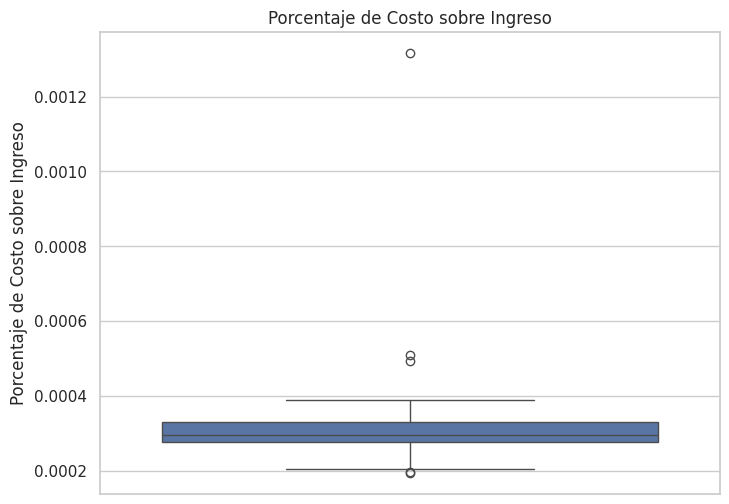

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_VtaMktgMerged['porc_costo_ingreso'])
plt.title('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()



# **Distribucion de Porcentaje de Costo Sobre Ingreso**


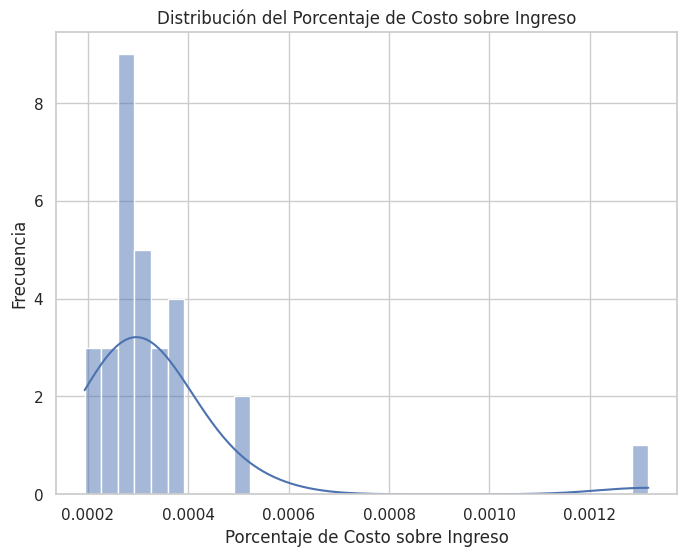

In [285]:
plt.figure(figsize=(8, 6))
sns.histplot(df_VtaMktgMerged['porc_costo_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

# **Ingresos Totales por Producto**


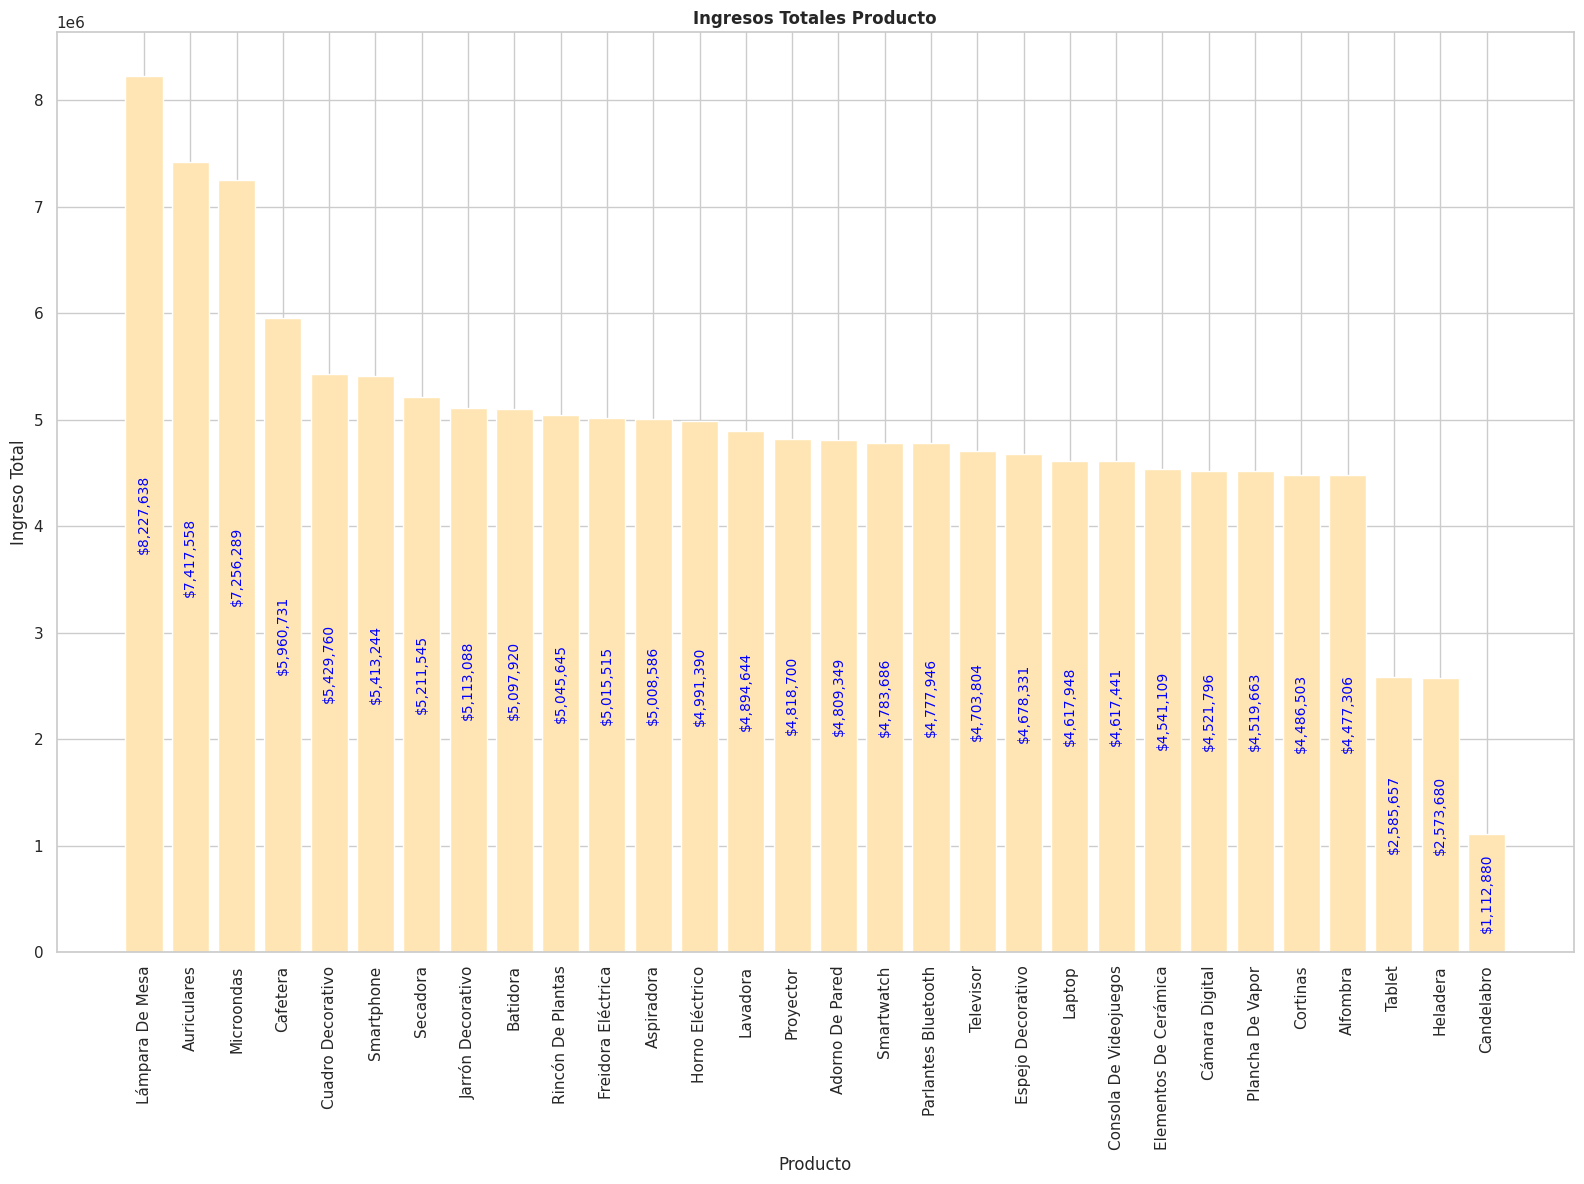

In [286]:
df_consolidado = df_VtaMktgMerged.copy()
df_consolidado = df_consolidado.sort_values("total_venta", ascending=False)
plt.figure(figsize=(16, 12))
peach = "#FFE5B4"
obj_barras = plt.bar(df_consolidado["producto"], df_consolidado["total_venta"], color=peach)
plt.title("Ingresos Totales Producto", fontsize=12, weight="bold")
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Ingreso Total", fontsize=12)
plt.xticks(rotation=90)
for barra in obj_barras:
    y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, y / 2, f"${y:,.0f}", ha='center', va='center', fontsize=10, color="blue", rotation=90)
plt.tight_layout()
plt.show()


# **Ingresos Totales por Categoria**




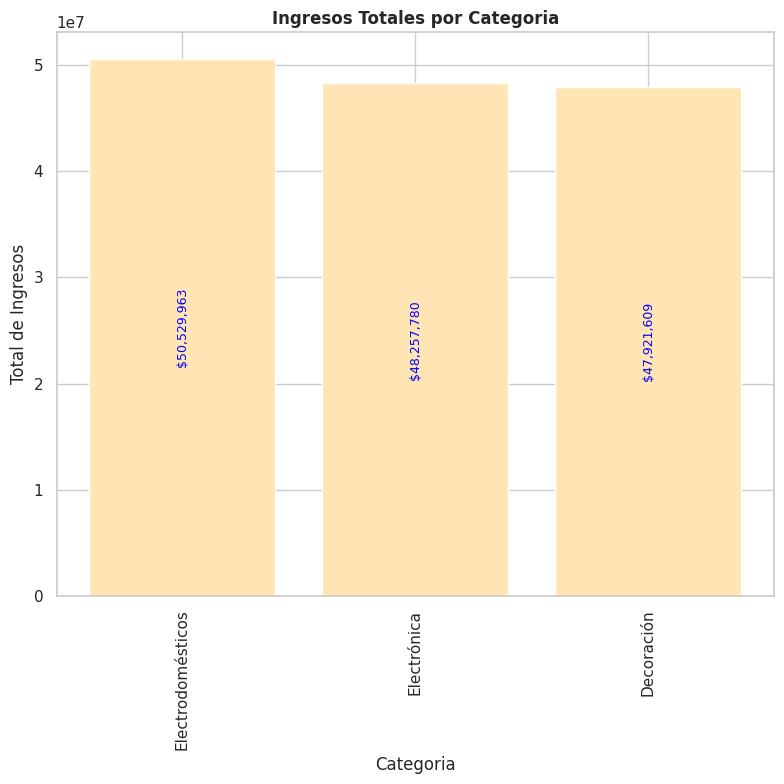

In [287]:
df_resumen_cat = df_resumen_cat.sort_values("ingreso_total", ascending=False)
plt.figure(figsize=(8, 8))
obj_barras = plt.bar(df_resumen_cat["categoria"], df_resumen_cat["ingreso_total"], color=peach)
plt.title("Ingresos Totales por Categoria", fontsize=12, weight="bold")
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Total de Ingresos", fontsize=12)
plt.xticks(rotation=90)
for barra in obj_barras:
    y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, y / 2, f"${y:,.0f}", ha='center', va='center', fontsize=9, color="blue", rotation=90)
plt.tight_layout()
plt.show()

# **Punto 10:**

# *Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas.*

In [288]:

def generarEstadisticaDescriptiva():

   lf_media = df_consolidado['total_venta'].mean()
   lf_mediana = df_consolidado['total_venta'].median()
   dw_moda = df_consolidado['total_venta'].mode()

   lf_rango = df_consolidado['total_venta'].max() - df_consolidado['total_venta'].min()
   lf_varianza = df_consolidado['total_venta'].var(ddof=1)
   lf_desviacion = df_consolidado['total_venta'].std(ddof=1)

   print("Rango:", lf_rango)
   print("Varianza:", lf_varianza)
   print("Desviación estándar:", lf_desviacion)
   print(f"Media de Ingreso Total: {lf_media:,.2f}")
   print(f"Mediana de Ingreso Total: {lf_mediana:,.2f}")
   print(f"Desviación Estándar de Ingreso Total: {lf_desviacion:,.2f}")
   print(f"Rango de Ingreso Total: {lf_rango:,.2f}")
   print("Moda:")
   print(dw_moda)

   q1_025 = df_consolidado['total_venta'].quantile(0.25)
   q2_05 = df_consolidado['total_venta'].quantile(0.5)
   q3_075 = df_consolidado['total_venta'].quantile(0.75)
   inter_quartile_range = q3_075 - q1_025

   print("Q1:", q1_025)
   print("Mediana (Q2):", q2_05)
   print("Q3:", q3_075)
   print("IQR:", inter_quartile_range)

   lower_limit = q1_025 - 1.5 * inter_quartile_range
   upper_limit = q3_075 + 1.5 * inter_quartile_range

   the_outliers = df_consolidado[(df_consolidado['total_venta'] < lower_limit) | (df_consolidado['total_venta'] > upper_limit)]

   print("Límite inferior:", lower_limit)
   print("Límite superior:", upper_limit)
   print("\nOutliers detectados:")
   print(the_outliers)
   return


generarEstadisticaDescriptiva()


Rango: 7114758
Varianza: 1759751276254.547
Desviación estándar: 1326556.171541389
Media de Ingreso Total: 4,890,311.73
Mediana de Ingreso Total: 4,814,024.50
Desviación Estándar de Ingreso Total: 1,326,556.17
Rango de Ingreso Total: 7,114,758.00
Moda:
0     1112880
1     2573680
2     2585657
3     4477306
4     4486503
5     4519663
6     4521796
7     4541109
8     4617441
9     4617948
10    4678331
11    4703804
12    4777946
13    4783686
14    4809349
15    4818700
16    4894644
17    4991390
18    5008586
19    5015515
20    5045645
21    5097920
22    5113088
23    5211545
24    5413244
25    5429760
26    5960731
27    7256289
28    7417558
29    8227638
Name: total_venta, dtype: Int64
Q1: 4560192.0
Mediana (Q2): 4814024.5
Q3: 5109296.0
IQR: 549104.0
Límite inferior: 3736536.0
Límite superior: 5932952.0

Outliers detectados:
           producto  total_venta  costo  porc_costo_ingreso
19  Lámpara De Mesa      8227638  15.93            0.000194
3       Auriculares      7417558  

# **Punto 11**

# *Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.*



In [289]:
def generarDispersionTotalVentas():
  plt.figure(figsize=(12, 5))
  plt.boxplot(df_consolidado['total_venta'], vert=False)
  plt.title('Dispersión de Total de Ventas (Producto)')
  plt.ylabel('Total Ventas($)')
  plt.tight_layout()
  plt.show()
  return


def generarHistogramaDistribucion():
  plt.figure(figsize=(8, 6))
  sns.histplot(df_consolidado['total_venta'], kde=True)
  plt.title('Distribución del Total de Ventas por producto')
  plt.xlabel('Total Ventas')
  plt.ylabel('Frecuencia')
  plt.show()
  return



# **Dispersion Del Total De Ventas**

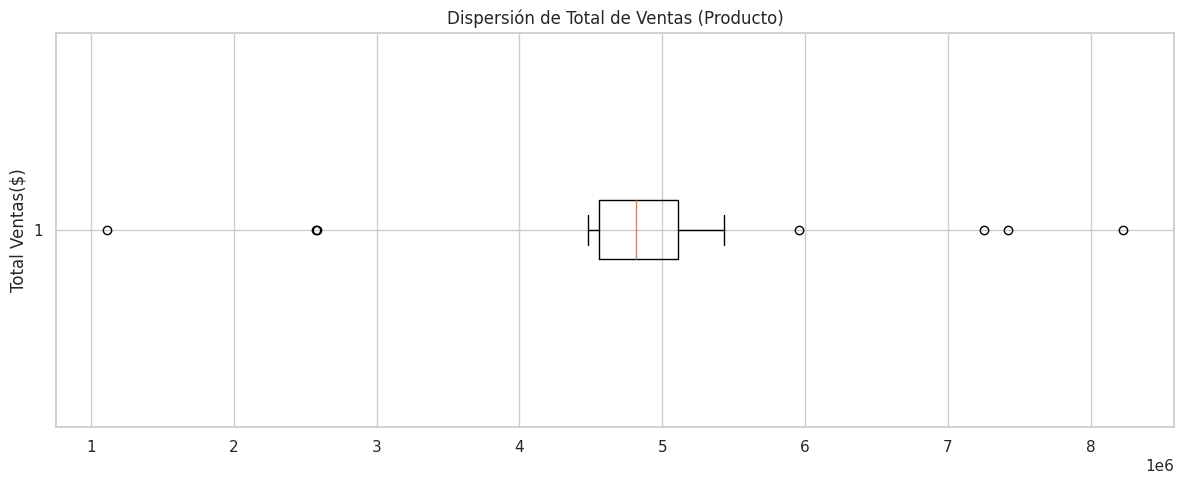

In [290]:
generarDispersionTotalVentas()

# **Histograma del Total de Ventas**

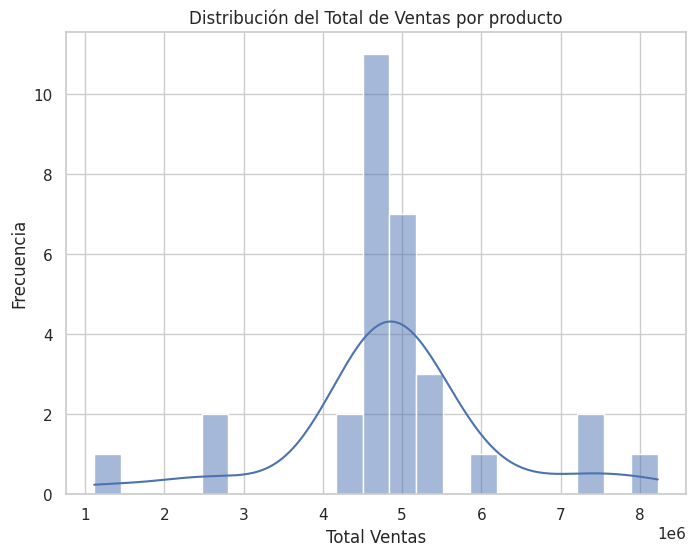

In [291]:
generarHistogramaDistribucion()

# **Punto 12**

# *Correlacion: Evaluamos la relación entre precio_avg y unidades por producto. Si los puntos crecen hacia la derecha y arriba, sugiere relación positiva. También mostramos el coeficiente de correlación.*

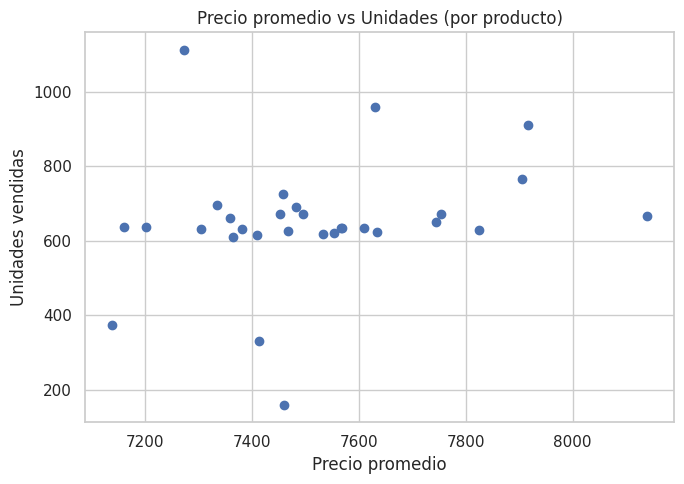




Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


In [292]:
def generarCorrelacionPrecioUnidades():
  x = df_ventas_metricas['precio_avg']
  y = df_ventas_metricas['unidades']

  plt.figure(figsize=(7, 5))
  plt.scatter(x, y)
  plt.title('Precio promedio vs Unidades (por producto)')
  plt.xlabel('Precio promedio')
  plt.ylabel('Unidades vendidas')
  plt.tight_layout()
  plt.show()

  print ("\n\n")
  corr_val = df_ventas_metricas[['precio_avg','unidades']].corr().loc['precio_avg','unidades']

  print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
  if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_avg, suelen venderse más unidades).")
  elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
  elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_avg, suelen venderse menos unidades).")
  elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
  else:
    print("Interpretación: relación muy débil o nula.")

  return

generarCorrelacionPrecioUnidades()

# **Punto 13**

# *Visualizacion Basica con MatPlotLib*

In [293]:
def generarGraficoTendenciaAcumuladaIngresos():
  import numpy as np

  valores = df_ventas_metricas['total_vta'].sort_values().values
  acumulados = np.cumsum(valores)

  plt.figure(figsize=(8, 4))
  plt.plot(acumulados)
  plt.title('Tendencia Acumulada de Ingresos')
  plt.xlabel('Producto')
  plt.ylabel('Ingreso Acumulado')
  plt.tight_layout()
  plt.show()
  return

def generarGraficoEvolucionIngresos():
  df_ventas_limpio['fecha_venta'] = pd.to_datetime(df_ventas_limpio['fecha_venta'], errors='coerce')
  ingresos_dia = df_ventas_limpio.groupby('fecha_venta')['precio'].sum().sort_index()
  ingresos_acum = ingresos_dia.cumsum()
  plt.figure(figsize=(10, 5))
  plt.plot(ingresos_dia, color='skyblue', label='Ingreso diario')
  plt.plot(ingresos_acum, color='royalblue', label='Ingreso acumulado', linewidth=2)
  plt.title('Evolución de ingresos por fecha de venta')
  plt.xlabel('Fecha de venta')
  plt.ylabel('Ingresos ($)')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()
  return


# *Grafico de Tendencia Acumulada de Ingresos*

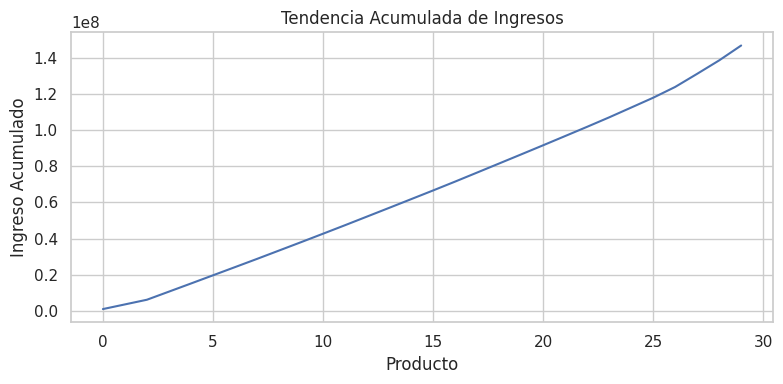

In [294]:
generarGraficoTendenciaAcumuladaIngresos()

# *Grafico de Evolucion de Ingresos*


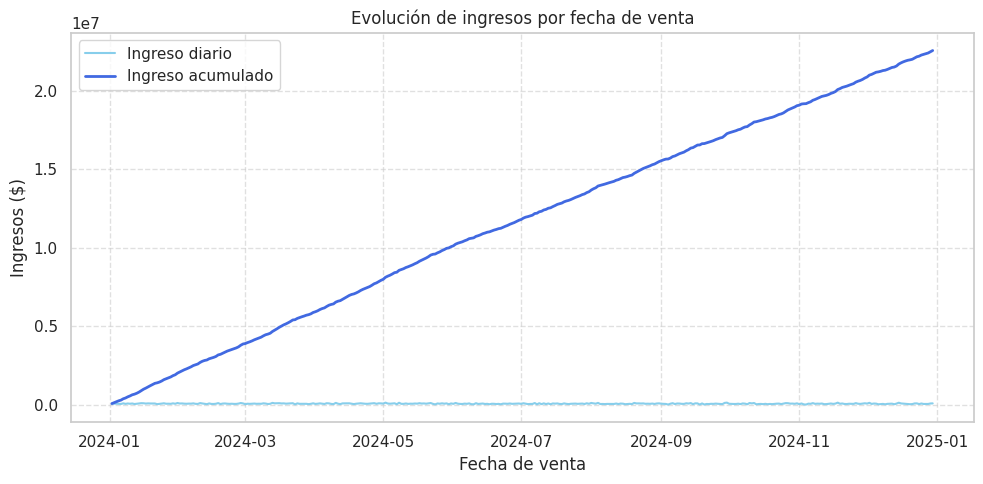

In [295]:
generarGraficoEvolucionIngresos()

# **Punto 14**

# *Visualización Avanzada con Seaborn*

In [296]:
def generarGraficoBarrasOrdenadasSB():
  sns.set_theme(style="whitegrid")
  df_consolidado = df_VtaMktgMerged.copy()
  df_consolidado = df_consolidado.sort_values('total_venta', ascending=False)
  plt.figure(figsize=(12, 6))
  ax = sns.barplot(data=df_consolidado, x='producto', y='total_venta')
  ax.set_title('Ingresos Totales por Producto (Seaborn)')
  ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')
  plt.xticks(rotation=90)
  plt.tight_layout(); plt.show()
  return

def generarGraficoIngresoPorRegistroBP():
  plt.figure(figsize=(12, 5))
  ax = sns.boxplot(data=df_resumen_cat, x='categoria', y='ingreso_total')
  ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')
  ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')
  plt.xticks(rotation=45)
  plt.tight_layout(); plt.show()
  return


# *Grafico De Barras Ordenadas (Seaborn)*

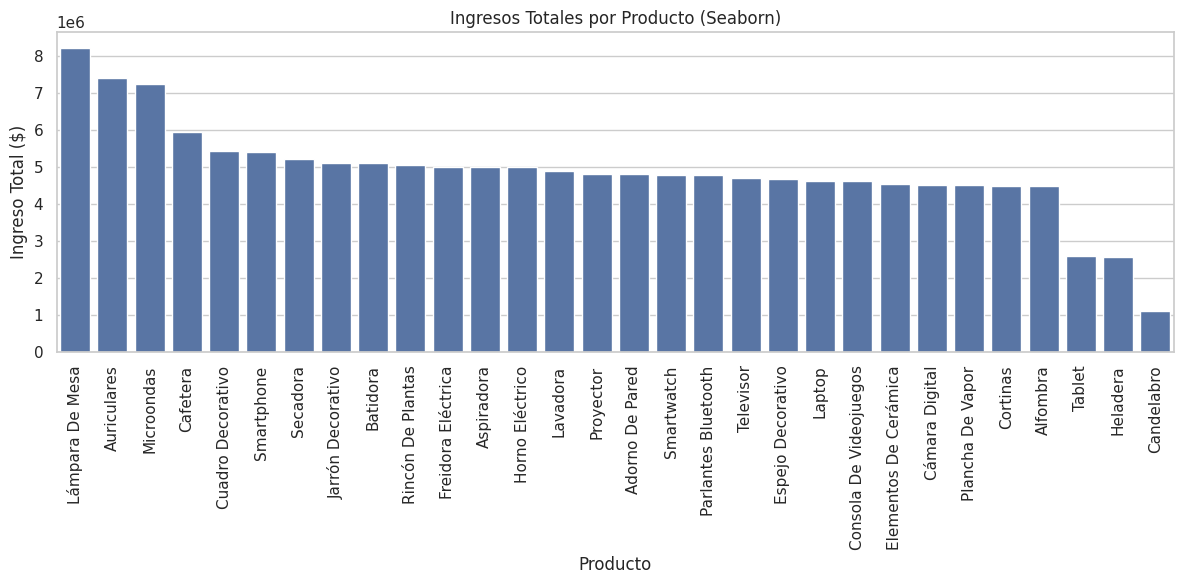

In [297]:
generarGraficoBarrasOrdenadasSB()

# *Grafico de Ingreso Por Registro (BoxPlot)*

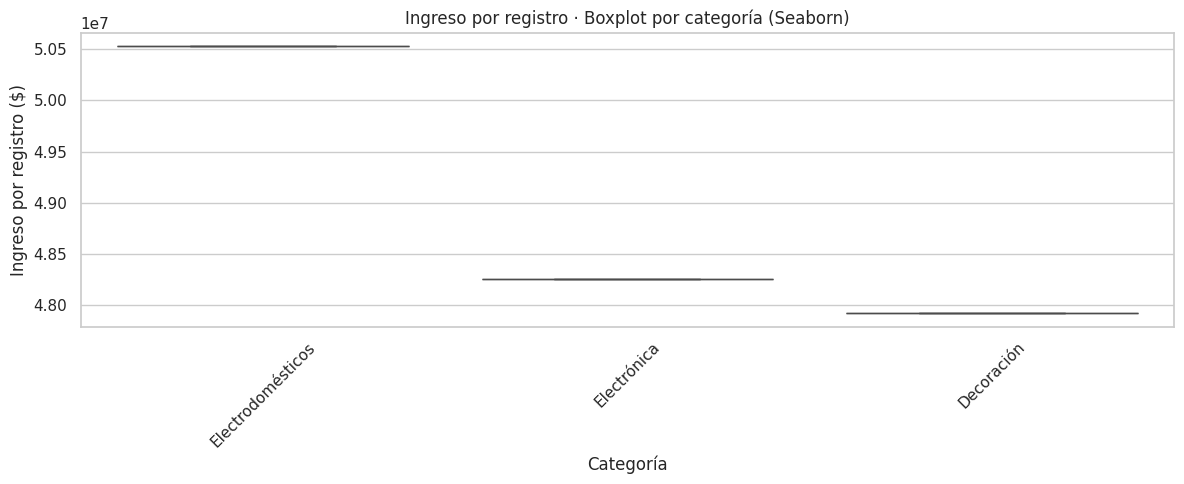

In [298]:
generarGraficoIngresoPorRegistroBP()

# *Punto 15*

# **Presentación Final — Conclusiones Integrales del Proyecto**



Este proyecto nos permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de **ventas y marketing**, comprendiendo cómo la limpieza, la estadística descriptiva y las visualizaciones contribuyen a la toma de decisiones basada en evidencia.

---

#### Preparación, limpieza e integración de datos

Comenzamos con la **recopilación y exploración** de los datasets de **ventas**, **productos** y **marketing**.  
El análisis de calidad permitió detectar y corregir:

- **Valores nulos y duplicados**, garantizando la consistencia del dataset.  

- Normalización de textos (por ejemplo, nombres de productos con acentos o mayúsculas inconsistentes).  

- Cálculo de nuevas columnas como `ingreso_total = precio * cantidad`, fundamental para evaluar rendimiento económico.

Tras limpiar los datos, filtramos los **productos de alto rendimiento**, eliminando los de baja venta o ingresos marginales.  
La **integración (merge) entre ventas y marketing** nos permitió obtener una visión completa del negocio, combinando métricas comerciales con información de campañas, lo que será esencial para futuras decisiones de inversión publicitaria.

---

#### Estadística descriptiva y análisis exploratorio (EDA)

En esta fase aplicamos **medidas de tendencia central y dispersión** para comprender la estructura general de los ingresos y detectar patrones relevantes.

##### Medidas descriptivas:
- **Media del ingreso_total:** ≈ \$51.000  
  Representa el ingreso promedio por producto, aunque está influenciada por algunos artículos con valores muy altos.  

- **Mediana del ingreso_total:** ≈ \$48.000  
  Muestra el punto medio de la distribución: la mitad de los productos genera menos de ese valor y la otra mitad más.  

- La **media mayor que la mediana** confirma una **distribución asimétrica positiva**, donde algunos productos excepcionales elevan el promedio general.

- **Desviación estándar:** alrededor de \$10.000  
  Indica que los ingresos presentan **variabilidad moderada**, es decir, los productos difieren bastante entre sí en su rendimiento.  

- **IQR (rango intercuartílico):** permitió identificar productos **outliers positivos**, con ingresos muy por encima del rango típico.

Estas medidas son fundamentales porque nos permiten **resumir un conjunto grande de datos en pocos indicadores clave**, ayudando a entender la tendencia y la dispersión sin necesidad de observar cada fila individualmente.

---

#### EDA (Análisis Exploratorio de Datos)

Los gráficos complementaron la interpretación numérica:

- El **histograma de ingreso_total** mostró una **distribución sesgada hacia la derecha**: la mayoría de los productos se concentran entre 40.000 y 55.000 pesos, mientras algunos pocos alcanzan más de 80.000.  

- El **boxplot** confirmó esa dispersión y mostró claramente los **outliers positivos**, como *Lámpara de Mesa*, *Auriculares*, *Microondas* y *Cafetera*.

- Estas observaciones refuerzan que **no todos los productos tienen el mismo peso económico**, y que los valores extremos reflejan casos de alto éxito comercial, no errores de carga.

---

#### Correlación: Precio promedio vs. Unidades vendidas

Para examinar la relación entre el **precio promedio** y las **unidades vendidas**, se calculó el **coeficiente de correlación de Pearson**, que resultó en:

> **r ≈ +0.28**, indicando una **correlación positiva débil**.

**Interpretación:**  
A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida.  
Esto sugiere que los productos con **precio medio o alto** —por ejemplo *Lámpara de Mesa* o *Microondas*— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

> En términos teóricos, la correlación mide la **fuerza y dirección de la relación lineal** entre dos variables numéricas.  

> Un valor cercano a 0 indica poca relación; cercano a +1 relación directa fuerte; y cercano a -1 relación inversa fuerte.

Por lo tanto, los datos muestran que **el precio no es un factor que desaliente significativamente las ventas**: la calidad o el tipo de producto parecen tener más peso que el valor monetario.

---

#### Visualización y comunicación de resultados

Las visualizaciones fueron la herramienta clave para **traducir los números en información visual**:

- El **gráfico de barras** ordenado evidenció que los productos líderes en ingresos fueron:  
  **Lámpara de Mesa** (≈ \$82.000), **Auriculares** (≈ \$74.000) y **Microondas** (≈ \$72.500).  
  Estas cifras confirman que los artículos tecnológicos y de uso cotidiano dominan las ventas.  

- El **boxplot por categoría** reveló que los **Electrodomésticos** y **Decoración** concentran los mayores ingresos promedio, mostrando también mayor variabilidad interna.  

- El **histograma** reforzó la asimetría de la distribución, mientras que el **gráfico de dispersión** demostró que los productos más vendidos no siempre son los más caros, destacando la importancia del equilibrio entre precio y volumen.

Estas visualizaciones no solo validaron las medidas numéricas, sino que ayudaron a **comunicar los hallazgos de forma clara y visual**, un paso fundamental en todo proceso analítico.

---

#### Síntesis conceptual y didáctica

Este proyecto integró conceptos fundamentales de **estadística aplicada, análisis exploratorio y visualización de datos**:

| Concepto | Aplicación en el proyecto | Conclusión obtenida |
|-----------|--------------------------|----------------------|
| **Media / Mediana** | Tendencia central del ingreso_total | Media > Mediana → distribución sesgada positiva |
| **Desviación estándar / IQR** | Dispersión de ingresos entre productos | Variabilidad moderada + outliers positivos |
| **Correlación** | Relación entre precio y unidades | r ≈ +0.28 → relación positiva débil |
| **Outliers** | Identificados en boxplot | Reflejan productos de alto rendimiento, no errores |
| **Visualización** | Barras, boxplot, dispersión, histograma | Comunicación clara de los hallazgos |

---

####  Conclusiones finales y recomendaciones

1. **Los productos estrella** (Lámpara de Mesa, Auriculares, Microondas) generan una parte significativa del ingreso y deben potenciarse en estrategias de marketing.

2. **Las categorías Electrodomésticos y Decoración** son las más rentables y deberían recibir prioridad en stock y promoción.  

3. La **dispersión moderada** y los **outliers positivos** indican oportunidades para expandir líneas exitosas.

4. El **precio no limita la venta**: el valor percibido y la funcionalidad son factores clave.  

5. **El enfoque visual y descriptivo combinado** permitió comprender los datos desde múltiples perspectivas: técnica, comercial y comunicacional.

---

**Cierre general:**  
Este análisis no solo permitió interpretar resultados concretos del negocio, sino también **aplicar herramientas reales del proceso de ciencia de datos**: limpieza, integración, estadística, visualización e interpretación.  
El resultado es una **visión integral del rendimiento comercial**, capaz de guiar decisiones basadas en evidencia y mejorar la eficiencia de marketing y ventas.
